C:\Users\PRANALI\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 394,634 (1.51 MB)

 Trainable params: 394,634 (1.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.2886 - loss: 1.9803 - val_accuracy: 0.3765 - val_loss: 1.7658
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3904 - loss: 1.7291 - val_accuracy: 0.3957 - val_loss: 1.7022
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4183 - loss: 1.6489 - val_accuracy: 0.4025 - val_loss: 1.6767
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4405 - loss: 1.5955 - val_accuracy: 0.4159 - val_loss: 1.6440
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.4556 - loss: 1.5547 - val_accuracy: 0.4345 - val_loss: 1.5994
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.4715 - loss: 1.5141 - val_accuracy: 0.4514 - val_loss: 1.5354
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.4767 - loss: 1.4854 - val_accuracy: 0.4418 - val_loss: 1.5763
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.4822 - loss: 1

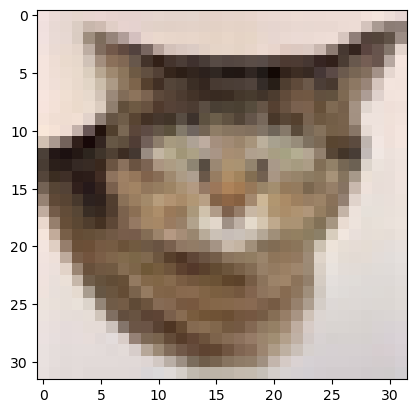

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Predicted Value: 6


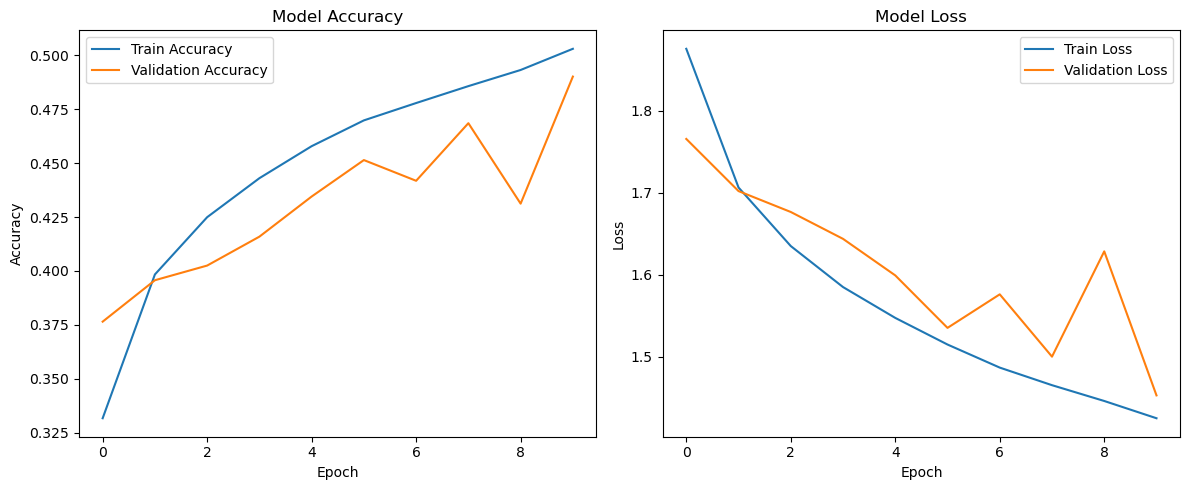

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

# Load CIFAR-10 dataset
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define the model
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),  # Corrected input shape for CIFAR-10
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

# Display model summary
model.summary()

# Compile the model
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Loss=%.3f" % test_loss)
print("Accuracy=%.3f" % test_acc)

# Random image prediction
n = random.randint(0, len(x_test) - 1)
plt.imshow(x_test[n])
plt.show()

# Predicting the label of the selected image
predicted_value = model.predict(x_test)
predicted_class = tf.argmax(predicted_value[n])  # Get the class with the highest probability
print('Predicted Value:', predicted_class.numpy())

# Plot accuracy and loss
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()
